# CLASSIFICATION OF AN IMBALANCED DATASET USING LOGISTIC REGRESSION

## German Credit dataset

* This dataset classifies people described by a set of attributes as good or bad credit risks.
* The dataset comes with a cost matrix:

      Good  Bad   
Good   0    1  (predicted)  
Bad    5    0  (actual)

According to the cost matrix, it is worse to predict that a customer has a good credit score when they're actually bad than it is to predict that a customer has bad credit score when they're good.

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Set up Visual appearance of plots
# chart size
plt.rcParams["figure.figsize"] = (10, 5)
#background
plt.style.use("fivethirtyeight")

In [2]:
# Import data from openml
credit_df = fetch_openml(data_id=31)

# Take a quick glimpse at the data
credit_df.data.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes


In [3]:
# Take a look at the target feature -- 'class'
credit_df.target.head(3)

0    good
1     bad
2    good
Name: class, dtype: category
Categories (2, object): ['good', 'bad']

In [4]:
# Merge the credit data and target
credit_df = pd.concat([credit_df.data, credit_df.target], axis=1)
credit_df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good


In [5]:
# Get the number of unique variables in the target feature
credit_df['class'].nunique()

2

In [6]:
# Convert the target variable from string to integer -- '0' represents a 'good credit' and '1' represents 'bad credit'
credit_df['class'] = (credit_df['class'] == 'bad').astype('int')
credit_df['class'].head(3)

0    0
1    1
2    0
Name: class, dtype: int64

In [7]:
# Percentage of the target variable that is classed as 'bad credit'
credit_df['class'].mean()

0.3

In [8]:
# Summary of Data
# This dataset contains 21 features and 1000 attributes
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [9]:
# Check the datatypes of the features
# 13 features are category, 7 are float64, 1(target) is integer
credit_df.dtypes

checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
class                        int64
dtype: object

In [10]:
# Look at features with data type - 'category'
credit_df.select_dtypes(include='category').head(3).T

,0,1,2
checking_status,<0,0<=X<200,no checking
credit_history,critical/other existing credit,existing paid,critical/other existing credit
purpose,radio/tv,radio/tv,education
savings_status,no known savings,<100,<100
employment,>=7,1<=X<4,4<=X<7
personal_status,male single,female div/dep/mar,male single
other_parties,none,none,none
property_magnitude,real estate,real estate,real estate
other_payment_plans,none,none,none
housing,own,own,own


## Setting up validation framework
Set up of the validation framework before further analysis

In [11]:
# Split data into train, validation, test
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(credit_df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [12]:
len(df_full_train), len(df_train), len(df_val), len(df_test)

(800, 600, 200, 200)

In [13]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0<=X<200,30.0,critical/other existing credit,new car,2181.0,no known savings,>=7,4.0,male single,none,...,real estate,36.0,none,own,2.0,skilled,1.0,none,yes,0
1,no checking,18.0,existing paid,new car,6761.0,no known savings,1<=X<4,2.0,male single,none,...,car,68.0,none,rent,2.0,skilled,1.0,none,yes,1
2,>=200,10.0,existing paid,furniture/equipment,1275.0,<100,<1,4.0,female div/dep/mar,none,...,life insurance,23.0,none,own,1.0,skilled,1.0,none,yes,0


In [14]:
y_train = df_train['class'].values
y_val = df_val['class'].values
y_test = df_test['class'].values


del df_train['class']
del df_val['class']
del df_test['class']

In [15]:
df_full = df_full_train.copy()
y_full = df_full['class']

del df_full['class']

## EDA

- Check missing values
- Look at the target variable (class)
- Look at numerical and categorical variables

In [16]:
df_full_train.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,no checking,22.0,existing paid,new car,1283.0,no known savings,4<=X<7,4.0,female div/dep/mar,none,...,life insurance,25.0,none,rent,1.0,skilled,1.0,none,yes,0
1,no checking,12.0,existing paid,new car,2390.0,no known savings,>=7,4.0,male single,none,...,car,50.0,none,own,1.0,skilled,1.0,yes,yes,0
2,>=200,21.0,existing paid,new car,2923.0,100<=X<500,1<=X<4,1.0,female div/dep/mar,none,...,car,28.0,bank,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,0


In [17]:
df_full_train.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [18]:
# Percentage of df_full_train 'class' that are good or bad credit
df_full_train['class'].value_counts(normalize=True)

0    0.69875
1    0.30125
Name: class, dtype: float64

In [19]:
df_full_train['class'].mean()

0.30125

In [20]:
# Check the number of unique variables in each category
df_full_train.select_dtypes(include='category').nunique()

checking_status         4
credit_history          5
purpose                10
savings_status          5
employment              5
personal_status         4
other_parties           3
property_magnitude      4
other_payment_plans     3
housing                 3
job                     4
own_telephone           2
foreign_worker          2
dtype: int64

In [21]:
# Create a list for categorical features
categorical = [
    'checking_status',
    'credit_history',
    'purpose',                
    'savings_status',          
    'employment',              
    'personal_status',         
    'other_parties',           
    'property_magnitude',      
    'other_payment_plans',     
    'housing',                 
    'job',                     
    'own_telephone',           
    'foreign_worker'        
]
categorical

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [22]:
df_full_train[categorical].head(3)

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
0,no checking,existing paid,new car,no known savings,4<=X<7,female div/dep/mar,none,life insurance,none,rent,skilled,none,yes
1,no checking,existing paid,new car,no known savings,>=7,male single,none,car,none,own,skilled,yes,yes
2,>=200,existing paid,new car,100<=X<500,1<=X<4,female div/dep/mar,none,car,bank,own,high qualif/self emp/mgmt,yes,yes


In [23]:
df_full_train.select_dtypes(include=np.number).head(3)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,22.0,1283.0,4.0,4.0,25.0,1.0,1.0,0
1,12.0,2390.0,4.0,3.0,50.0,1.0,1.0,0
2,21.0,2923.0,1.0,1.0,28.0,1.0,1.0,0


In [24]:
# Create a list for numerical features
numerical =[
    'duration',
    'credit_amount',
    'installment_commitment',
    'residence_since',
    'age',
    'existing_credits', 
    'num_dependents'
]

In [25]:
df_full_train[numerical].head(3)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,22.0,1283.0,4.0,4.0,25.0,1.0,1.0
1,12.0,2390.0,4.0,3.0,50.0,1.0,1.0
2,21.0,2923.0,1.0,1.0,28.0,1.0,1.0


## FEATURE IMPORTANCE: MUTUAL INFORMATION

Categorical

In [26]:
from sklearn.metrics import mutual_info_score

def mutual_info_class_score(series):
    return mutual_info_score(series, df_full_train['class'])

mutual_info = df_full_train[categorical].apply(mutual_info_class_score)
mutual_info.sort_values(ascending=False)

checking_status        0.064979
credit_history         0.038718
purpose                0.021878
savings_status         0.020723
property_magnitude     0.008991
employment             0.008707
housing                0.008128
other_payment_plans    0.005233
other_parties          0.004718
personal_status        0.003593
foreign_worker         0.003021
own_telephone          0.001127
job                    0.001107
dtype: float64

## FEATURE IMPORTANCE: Correlation

Numerical

In [27]:
corr_full_train = df_full_train[numerical].corr()
corr_full_train

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.627604,0.081277,0.033178,-0.006347,-0.041805,-0.012973
credit_amount,0.627604,1.000000,-0.266372,0.043087,0.047857,0.005021,0.018462
installment_commitment,0.081277,-0.266372,1.000000,0.043050,0.080310,0.041857,-0.048140
residence_since,0.033178,0.043087,0.043050,1.000000,0.277631,0.087879,0.049210
age,-0.006347,0.047857,0.080310,0.277631,1.000000,0.169249,0.101522
existing_credits,-0.041805,0.005021,0.041857,0.087879,0.169249,1.000000,0.123067
num_dependents,-0.012973,0.018462,-0.048140,0.049210,0.101522,0.123067,1.000000


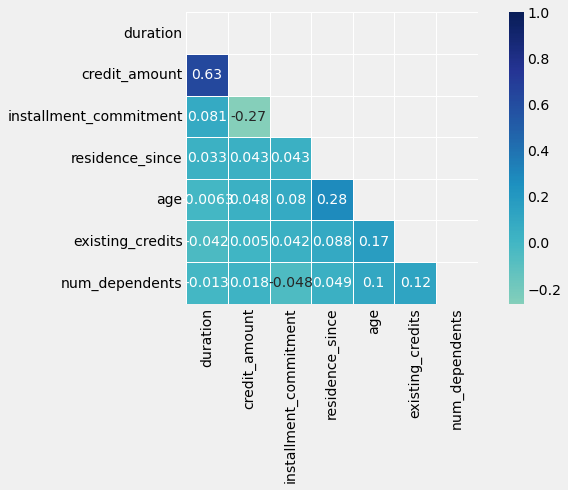

In [28]:
# f, ax = plt.subplots(figsize=(25, 20))
mask = np.triu(np.ones_like(corr_full_train, dtype=bool))
cmap = "YlGnBu"
sns.heatmap(corr_full_train, mask=mask, vmax=1,cmap=cmap, center=0, annot = True,
            square=True, linewidths=.5)
plt.show()

In [29]:
# Correlation with target
corr_with_class = df_full_train[numerical].corrwith(df_full_train['class'])
corr_with_class.sort_values(ascending=False)

duration                  0.205320
credit_amount             0.151003
installment_commitment    0.103902
residence_since           0.011366
num_dependents            0.008163
existing_credits         -0.061331
age                      -0.086342
dtype: float64

## ENCODING CATEGORICAL FEATURES, STANDARDIZING NUMERICAL FEATURES

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector


column_trans = ColumnTransformer(
    [
        ('scaler', StandardScaler(), make_column_selector(dtype_include=np.number)),
        ('categories', OneHotEncoder(), make_column_selector(dtype_exclude=np.number)),  
    ],
    remainder='drop', verbose_feature_names_out=False)

In [31]:
X_train = column_trans.fit_transform(df_train)
X_train[3]

X_val = column_trans.fit_transform(df_val)

In [32]:
# column_trans.get_feature_names_out()

In [33]:
# Define model
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [34]:
model.predict(X_train)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [35]:
y_pred = model.predict_proba(X_val)[:, 1]

In [36]:
scoring_decision = (y_pred >= 0.5)

In [37]:
(y_val == scoring_decision).mean()

0.775

## Model interpretation

* Look at the coefficients

In [38]:
# Bias
model.intercept_[0]

-1.3394845070671235

In [39]:
# Variance
model.coef_[0].round(3)

array([ 0.121,  0.638,  0.527,  0.117, -0.184, -0.013,  0.112,  0.256,
        0.702, -0.2  , -0.759,  0.585, -0.789, -0.284,  0.092,  0.395,
        0.274, -0.13 ,  0.755, -0.033,  0.713, -0.097, -0.327,  0.309,
       -0.313, -1.151,  0.185,  0.07 ,  0.483, -0.576, -0.163,  0.097,
       -0.532,  0.035, -0.086,  0.485,  0.081,  0.315, -0.01 , -0.387,
        0.456, -0.367, -0.089, -0.01 ,  0.167,  0.138, -0.296,  0.046,
       -0.253,  0.207, -0.113, -0.196,  0.308,  0.111,  0.257, -0.806,
        0.437,  0.211, -0.212, -0.504,  0.503])

In [40]:
dict(zip(column_trans.get_feature_names_out(), model.coef_[0].round(3)))

{'duration': 0.121,
 'credit_amount': 0.638,
 'installment_commitment': 0.527,
 'residence_since': 0.117,
 'age': -0.184,
 'existing_credits': -0.013,
 'num_dependents': 0.112,
 'checking_status_0<=X<200': 0.256,
 'checking_status_<0': 0.702,
 'checking_status_>=200': -0.2,
 'checking_status_no checking': -0.759,
 'credit_history_all paid': 0.585,
 'credit_history_critical/other existing credit': -0.789,
 'credit_history_delayed previously': -0.284,
 'credit_history_existing paid': 0.092,
 'credit_history_no credits/all paid': 0.395,
 'purpose_business': 0.274,
 'purpose_domestic appliance': -0.13,
 'purpose_education': 0.755,
 'purpose_furniture/equipment': -0.033,
 'purpose_new car': 0.713,
 'purpose_other': -0.097,
 'purpose_radio/tv': -0.327,
 'purpose_repairs': 0.309,
 'purpose_retraining': -0.313,
 'purpose_used car': -1.151,
 'savings_status_100<=X<500': 0.185,
 'savings_status_500<=X<1000': 0.07,
 'savings_status_<100': 0.483,
 'savings_status_>=1000': -0.576,
 'savings_status_

## Accuracy

* Check the accuracy
* Evaluate the model on different thresholds

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred >= 0.5)

0.775

In [42]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.270
0.05 0.400
0.10 0.495
0.15 0.590
0.20 0.645
0.25 0.705
0.30 0.730
0.35 0.755
0.40 0.770
0.45 0.775
0.50 0.775
0.55 0.785
0.60 0.765
0.65 0.790
0.70 0.770
0.75 0.765
0.80 0.765
0.85 0.745
0.90 0.740
0.95 0.725
1.00 0.730


The model had best accuracy score at 0.65 threshold

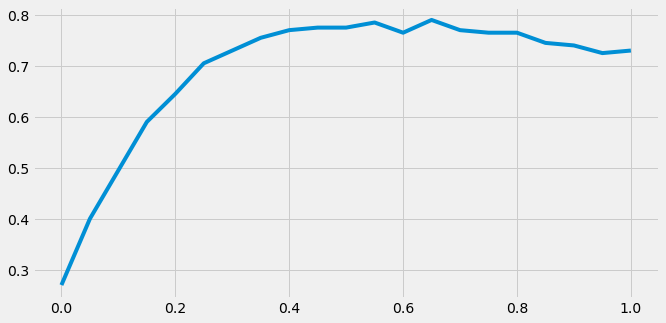

In [43]:
plt.plot(thresholds, scores)

In [44]:
from collections import Counter

Counter(y_pred >= 1.0)

Counter({False: 200})

In [45]:
# Get number of good and bad credit score
Counter(y_val)

Counter({0: 146, 1: 54})

In [46]:
# bad credit score/percentage
y_val.mean()

0.27

In [47]:
# good credit score
1 - y_val.mean()

0.73

## Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix

new_t = 0.65
confusion_matrix(y_val, (y_pred >= new_t))

array([[135,  11],
       [ 31,  23]])

Even though we had the highest accuracy at t = 0.65, the confusion matrix shows that that there are a lot of False Negatives(FN) at this threshold

We want FN to be as small as possible.
At t = 0.5, FN is less

In [49]:
confusion_matrix(y_val, (y_pred >= 0.5))

array([[123,  23],
       [ 22,  32]])

In [50]:
cm_t = confusion_matrix(y_val, y_pred >= new_t, normalize='all')
print('cm_t:', cm_t)
print()
cm = confusion_matrix(y_val, y_pred >= 0.5, normalize='all')
print('cm:', cm)

cm_t: [[0.675 0.055]
 [0.155 0.115]]

cm: [[0.615 0.115]
 [0.11  0.16 ]]


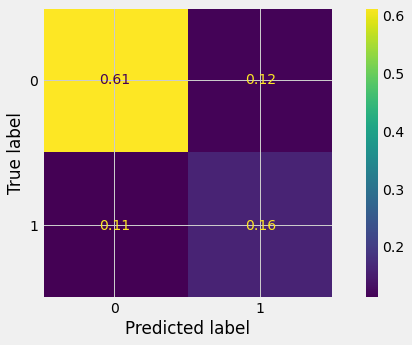

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## Precision and Recall
A perfect precision or recall score is 1

In [52]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, PrecisionRecallDisplay

t = 0.5
print('precision_score:', precision_score(y_val, y_pred >= t))
print()
print('recall_score:', recall_score(y_val, y_pred >= t))
print()
print(precision_recall_curve(y_val, y_pred >= t))
print()

precision_score: 0.5818181818181818

recall_score: 0.5925925925925926

(array([0.27      , 0.58181818, 1.        ]), array([1.        , 0.59259259, 0.        ]), array([False,  True]))



In [53]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_val, y_pred>=.5))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.84      0.59      0.85      0.71      0.51       146
          1       0.58      0.59      0.84      0.59      0.71      0.49        54

avg / total       0.78      0.78      0.66      0.78      0.71      0.50       200



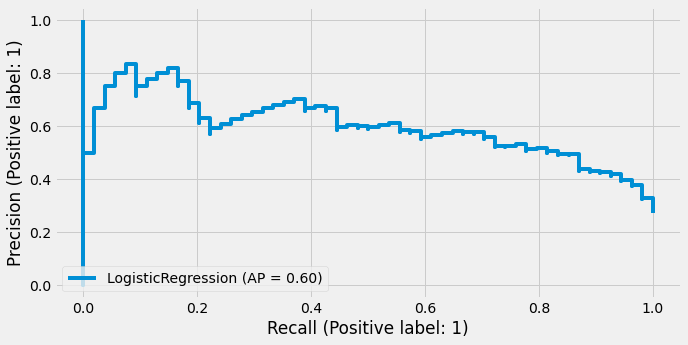

In [54]:
# We want a high Recall value -- ie: FN should be close to zero
PrecisionRecallDisplay.from_estimator(model, X_val, y_val)
plt.show()

## F1 SCORE

f1 score is the weighted harmonic mean between precision and recall with best value at 1 and worst at 0

In [55]:
from sklearn.metrics import f1_score

f1_score(y_val, y_pred>=0.5)

0.5871559633027522

In [56]:
from sklearn.metrics import fbeta_score

fbeta_score(y_val, y_pred>=.5, beta=1.5)

0.5892351274787535

## ROC Curve

* A graphical plot that illustrates the performance of a binary classifier system as it threshold is varied
* Created by plotting TPR over FPR

In [57]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

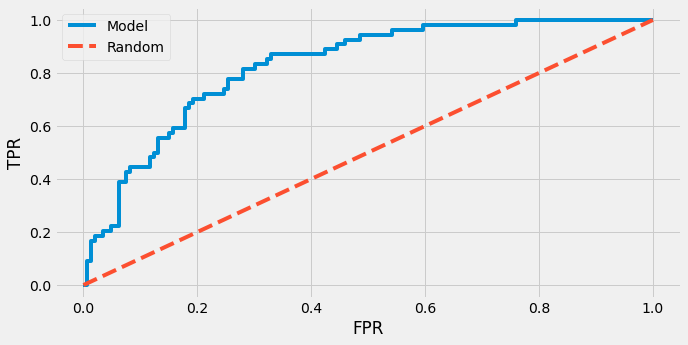

In [58]:
# plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--') #baseline

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

The ideal spot is when TPR is 100% and FPR is 0. The curve should be far from the baseline

Plot directly from RocCurveDisplay

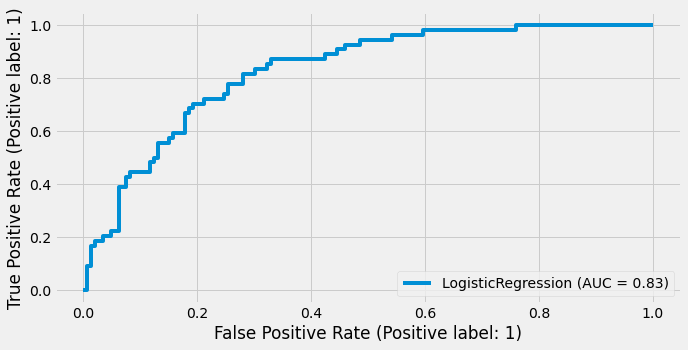

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

roc_auc_score(y_val, y_pred)
RocCurveDisplay.from_estimator(model, X_val, y_val)

##  Cross-Validation

* Evaluate model on different subsets of data
* Get the average prediction

In [60]:
# Define a Train function

def train(df_train, y_train, C=1.0):
    column_trans = ColumnTransformer(
    [
        ('scaler', StandardScaler(), make_column_selector(dtype_include=np.number)),
        ('categories', OneHotEncoder(), make_column_selector(dtype_exclude=np.number)),  
    ],
    remainder='drop', verbose_feature_names_out=False)
    
    X_train = column_trans.fit_transform(df_train)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return column_trans, model

In [61]:
column_trans, model = train(df_train, y_train, C=0.001)

In [62]:
df_train.shape, X_train.shape, y_train.shape

((600, 20), (600, 61), (600,))

In [63]:
column_trans

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f15959100a0>),
                                ('categories', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1595910c70>)],
                  verbose_feature_names_out=False)

In [64]:
model

LogisticRegression(C=0.001, max_iter=1000)

In [65]:
# Define a predict function

def predict(df, column_trans, model):
    X = column_trans.transform(df)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [66]:
y_pred = predict(df_val, column_trans, model)

In [67]:
# Cross validation

from sklearn.model_selection import StratifiedKFold

n_splits = 5
for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    skfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    accuracy = []
    
    for train_idx, val_idx in skfold.split(df_full, y_full):
        
        X_train, X_val = df_full.iloc[train_idx], df_full.iloc[val_idx]
        y_train, y_val = y_full.iloc[train_idx], y_full.iloc[val_idx]
               
        column_trans, model = train(X_train, y_train, C=C)
        y_pred = predict(X_val, column_trans, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
        acc = accuracy_score(y_val, y_pred>=0.5)                          
        accuracy.append(acc)

    print('C=%s %.3f +- %.3f %.3f' % (C, np.mean(scores), np.std(scores), np.mean(accuracy)))

C=0.001 0.748 +- 0.041 0.699
C=0.01 0.774 +- 0.021 0.715
C=0.1 0.786 +- 0.018 0.756
C=0.5 0.783 +- 0.026 0.745
C=1 0.781 +- 0.029 0.744
C=5 0.777 +- 0.032 0.738
C=10 0.776 +- 0.033 0.738


Model had the best roc_auc_score at C = 0.1

## Different Methods of Learning from Imbalanced Data

* Use the metric balanced_accuracy_score which takes into account the balancing issue
* Try different sampling techniques with preferred model

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score

num_pipe = make_pipeline(StandardScaler())
cat_pipe = make_pipeline(OneHotEncoder())

preprocessor = make_column_transformer(
    (num_pipe, selector(dtype_include=np.number)),
    (cat_pipe, selector(dtype_exclude=np.number)),
    )

# Logistic regression
lr_model = make_pipeline(preprocessor, LogisticRegression(C=0.1, max_iter=1000))
scoring = ["accuracy", "balanced_accuracy", "recall", "roc_auc"]

index = []
scores = {"Accuracy": [], "Balanced accuracy": [], "Recall": [], "Roc Auc": []}

index += ["Logistic Regression"]
cv_result = cross_validate(lr_model, df_full, y_full, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())
scores["Recall"].append(cv_result["test_recall"].mean())
scores["Roc Auc"].append(cv_result["test_roc_auc"].mean())



df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy,Recall,Roc Auc
Logistic Regression,0.7625,0.670633,0.439626,0.791352


In [69]:
# Use logistic regression + class weight

lr_model.set_params(logisticregression__class_weight="balanced")

index += ["Logistic Regression + class weight"]
cv_result = cross_validate(lr_model, df_full, y_full, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())
scores["Recall"].append(cv_result["test_recall"].mean())
scores["Roc Auc"].append(cv_result["test_roc_auc"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy,Recall,Roc Auc
Logistic Regression,0.76250,0.670633,0.439626,0.791352
Logistic Regression + class weight,0.72375,0.727913,0.738435,0.792091


In [70]:
# Use logistic regression + undersampling

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler

lr_model = make_pipeline_with_sampler(
    preprocessor,
    RandomUnderSampler(random_state=42),
    LogisticRegression(C=0.1, max_iter=1000),
)

index += ["Logistic Regression + Undersampling"]
cv_result = cross_validate(lr_model, df_full, y_full, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())
scores["Recall"].append(cv_result["test_recall"].mean())
scores["Roc Auc"].append(cv_result["test_roc_auc"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy,Recall,Roc Auc
Logistic Regression,0.76250,0.670633,0.439626,0.791352
Logistic Regression + class weight,0.72375,0.727913,0.738435,0.792091
Logistic Regression + Undersampling,0.70625,0.723781,0.767687,0.793104


In [71]:
# Use logistic regression + oversampling

from imblearn.over_sampling import SMOTE

lr_model = make_pipeline_with_sampler(
    preprocessor,
    SMOTE(random_state=0),
    LogisticRegression(C=0.1, max_iter=1000),
)

index += ["Logistic Regression + SMOTE"]
cv_result = cross_validate(lr_model, df_full, y_full, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())
scores["Recall"].append(cv_result["test_recall"].mean())
scores["Roc Auc"].append(cv_result["test_roc_auc"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores                     

,Accuracy,Balanced accuracy,Recall,Roc Auc
Logistic Regression,0.76250,0.670633,0.439626,0.791352
Logistic Regression + class weight,0.72375,0.727913,0.738435,0.792091
Logistic Regression + Undersampling,0.70625,0.723781,0.767687,0.793104
Logistic Regression + SMOTE,0.72125,0.717990,0.709694,0.789741


In [72]:
# Use logistic regression + oversampling & undersampling

lr_model = make_pipeline_with_sampler(
    preprocessor,
    SMOTE(random_state=0),
    RandomUnderSampler(random_state=42),
    LogisticRegression(C=0.1, max_iter=1000),
)

index += ["Logistic Regression + SMOTE + under"]
cv_result = cross_validate(lr_model, df_full, y_full, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())
scores["Recall"].append(cv_result["test_recall"].mean())
scores["Roc Auc"].append(cv_result["test_roc_auc"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores                     

,Accuracy,Balanced accuracy,Recall,Roc Auc
Logistic Regression,0.76250,0.670633,0.439626,0.791352
Logistic Regression + class weight,0.72375,0.727913,0.738435,0.792091
Logistic Regression + Undersampling,0.70625,0.723781,0.767687,0.793104
Logistic Regression + SMOTE,0.72125,0.717990,0.709694,0.789741
Logistic Regression + SMOTE + under,0.72125,0.717990,0.709694,0.789741


The model with the best balanced_accuracy_score is 'logistic regression + class weight', with 'logistic regression + 
undersampling' following suit with a slightly higher roc_auc_score.

### Train Full data 

Use the model with the best balanced accuracy for further training.

In [73]:
# Define a Train2 function, specify 'class_weight' parameter

def train2(df_train, y_train, C=1.0):
    column_trans = ColumnTransformer(
    [
        ('scaler', StandardScaler(), make_column_selector(dtype_include=np.number)),
        ('categories', OneHotEncoder(), make_column_selector(dtype_exclude=np.number)),  
    ],
    remainder='drop', verbose_feature_names_out=False)
    
    X_train = column_trans.fit_transform(df_train)

    model = LogisticRegression(C=C, max_iter=1000, class_weight = 'balanced')
    model.fit(X_train, y_train)
    
    return column_trans, model

In [74]:
# Use entire dataset for cross validation except for 'df_test'

n_splits = 5
for C in [0.001, 0.01, 0.1, 0.5, 1, 5]:
    skfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    accuracy = []
    
    for train_idx, val_idx in skfold.split(df_full, y_full):
        
        X_train, X_val = df_full.iloc[train_idx], df_full.iloc[val_idx]
        y_train, y_val = y_full.iloc[train_idx], y_full.iloc[val_idx]
               
        column_trans, model = train2(X_train, y_train, C=C)
        y_pred = predict(X_val, column_trans, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
        acc = accuracy_score(y_val, y_pred>=0.5)                          
        accuracy.append(acc)

    print('C=%s %.3f +- %.3f %.3f' % (C, np.mean(scores), np.std(scores), np.mean(accuracy)))

C=0.001 0.750 +- 0.040 0.686
C=0.01 0.776 +- 0.019 0.718
C=0.1 0.787 +- 0.019 0.715
C=0.5 0.784 +- 0.027 0.720
C=1 0.781 +- 0.030 0.719
C=5 0.776 +- 0.033 0.713


## Using the model

In [75]:
# Predict
column_trans, model = train2(df_full, y_full, C=0.1)
y_pred = predict(df_test, column_trans, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.771967784589494

In [76]:
# Evaluate performance on test set

print(classification_report_imbalanced(y_test, y_pred>=.5))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.75      0.63      0.79      0.69      0.48       141
          1       0.51      0.63      0.75      0.56      0.69      0.47        59

avg / total       0.74      0.71      0.66      0.72      0.69      0.47       200



In [77]:
# Dummy customer to test our model
customer = df_test[:1]

In [78]:
# Save model to a file

import pickle

with open('model.bin', 'wb') as f_out:
   pickle.dump((column_trans, model), f_out)

In [79]:
with open('model.bin', 'rb') as f_in:
    column_trans, model = pickle.load(f_in)

In [80]:
X = column_trans.transform(customer)

In [81]:
model.predict_proba(X)[0, 1]

0.5559627856690232

In [82]:
# check that model made a correct prediction
y_test[:1]

array([1])